# Manipulação Básica de Dados

## 1. Importando e Corrigindo dados
Dados foram importados de planilha de Excel e arquivos de texto.
Atraves de "merge" foram criadas demais colunas no banco de dados principais.

In [61]:
# O comando abaixo deve ser rodado no termial para que os widgets aparecam
# jupyter nbextension enable --py widgetsnbextension 
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
from IPython.core.pylabtools import figsize

import seaborn as sns
sns.set_style("dark")
# sns.set_style("darkgrid")
# sns.set_context("talk")
import pandas as pd

import missingno as msno

Primeiro passo consiste em importar as bibliotecas.

In [62]:
folder     = 'SampleDataBase/ExampleSalesData/' #Definir pasta de onde virão os dados
data       = pd.read_table(folder+"Base_dados.txt")
produto    = pd.read_excel(folder+"Curso_Excel.xlsm",sheetname=0)
marca      = pd.read_excel(folder+"Curso_Excel.xlsm",sheetname=1)
vendedores = pd.read_table(folder+"Base_Vendedores.txt", sep=';',decimal=',')

In [63]:
print('data')
print(' ')
print(data.dtypes)
print('--')
print('produto')
print(' ')
print(produto.dtypes)

print('--')
print('marca')
print(' ')
print(marca.dtypes)

print('--')
print('vendedores')
print(' ')
print(vendedores.dtypes)

data
 
DATA                object
COD_ITEM            object
COD_VENDEDOR         int64
VOLUME_META          int64
RECEITA_META         int64
VOLUME_FATURADO      int64
RECEITA_FATURADO     int64
dtype: object
--
produto
 
COD_PRODUTO     object
NOME_PRODUTO    object
dtype: object
--
marca
 
COD_MARCA     object
NOME_MARCA    object
dtype: object
--
vendedores
 
COD_VENDEDOR     float64
NOME_VENDEDOR     object
FILIAL            object
dtype: object


In [64]:
data.head()

,DATA,COD_ITEM,COD_VENDEDOR,VOLUME_META,RECEITA_META,VOLUME_FATURADO,RECEITA_FATURADO
0,1/3/2002,AC08,13,13,6630,6,3102
1,1/3/2002,AC08,18,9,4590,6,3559
2,1/3/2002,AC08,28,14,7140,7,2981
3,1/3/2002,AC08,1033,5,2550,4,1844
4,1/3/2002,FB04,6,13,6825,7,4220


In [65]:
data.describe()

,COD_VENDEDOR,VOLUME_META,RECEITA_META,VOLUME_FATURADO,RECEITA_FATURADO
count,6675.000000,6675.000000,6675.000000,6675.000000,6675.000000
mean,248.585468,9.268464,6269.421723,9.292734,6548.154157
std,424.717730,5.539069,4641.905489,5.459443,4746.902883
min,1.000000,1.000000,300.000000,1.000000,250.000000
25%,9.000000,5.000000,2800.000000,5.000000,3083.500000
50%,18.000000,9.000000,5390.000000,9.000000,5535.000000
75%,32.000000,13.000000,8260.000000,13.000000,8779.000000
max,1265.000000,45.000000,51750.000000,51.000000,44406.000000


In [66]:
# plt.plot(data.VOLUME_META,data.VOLUME_FATURADO,'o')
marca

,COD_MARCA,NOME_MARCA
0,B,Brastemp
1,C,Cônsul


In [67]:
produto.head()

,COD_PRODUTO,NOME_PRODUTO
0,F,Fogão
1,R,Refrigerador
2,L,Lava-Louças
3,A,Ar-Condicionado


In [68]:
vendedores.head()

,COD_VENDEDOR,NOME_VENDEDOR,FILIAL
0,1.0,ADONAY LARONGA,SUL
1,3.0,OSWALDO LOPES DA SILVA,NORDESTE
2,4.0,MARIO JARBAS V.DO A JUNIOR,NORDESTE
3,5.0,ANGELA CRISTINA CRIVELARO FONS,SUDESTE
4,6.0,MANOEL DO PRADO,SUDESTE


In [69]:
#Ajustando o tipo de dado

data.DATA  = pd.to_datetime(data.DATA,infer_datetime_format=True) #Ajustando formato para data
# data.DATA  = pd.to_datetime(data.DATA,format='%d/%m/%Y') #Ajustando formato para data usando "format"

vendedores.COD_VENDEDOR = vendedores.COD_VENDEDOR.astype(int) #

data['COD_PRODUTO'] = data.COD_ITEM.str[0]
data['COD_MARCA']   = data.COD_ITEM.str[1]

In [70]:
data = pd.merge(data,vendedores,on='COD_VENDEDOR',how='outer')
data = pd.merge(data,produto,on='COD_PRODUTO',how='outer')
data = pd.merge(data,marca,on='COD_MARCA',how='outer')
data.drop(['COD_PRODUTO','COD_VENDEDOR','COD_MARCA'],axis=1,inplace=True)

In [71]:
data.head()

,DATA,COD_ITEM,VOLUME_META,RECEITA_META,VOLUME_FATURADO,RECEITA_FATURADO,NOME_VENDEDOR,FILIAL,NOME_PRODUTO,NOME_MARCA
0,2002-01-03,AC08,13,6630,6,3102,JANETE APARECIDA ANDRADE,NORDESTE,Ar-Condicionado,Cônsul
1,2002-08-03,AC08,1,510,11,6250,JANETE APARECIDA ANDRADE,NORDESTE,Ar-Condicionado,Cônsul
2,2002-12-03,AC08,5,2550,12,5468,JANETE APARECIDA ANDRADE,NORDESTE,Ar-Condicionado,Cônsul
3,2002-03-13,AC08,8,4080,10,4530,JANETE APARECIDA ANDRADE,NORDESTE,Ar-Condicionado,Cônsul
4,2002-03-14,AC08,14,7140,7,3818,JANETE APARECIDA ANDRADE,NORDESTE,Ar-Condicionado,Cônsul


In [72]:
data.describe()

,VOLUME_META,RECEITA_META,VOLUME_FATURADO,RECEITA_FATURADO
count,6675.000000,6675.000000,6675.000000,6675.000000
mean,9.268464,6269.421723,9.292734,6548.154157
std,5.539069,4641.905489,5.459443,4746.902883
min,1.000000,300.000000,1.000000,250.000000
25%,5.000000,2800.000000,5.000000,3083.500000
50%,9.000000,5390.000000,9.000000,5535.000000
75%,13.000000,8260.000000,13.000000,8779.000000
max,45.000000,51750.000000,51.000000,44406.000000


Dados possuem informações faltantes. Abaixo tais informações faltantes são mostradas.
Os dados faltantes podem ser preenchidos com algum valor padrão, como 'DESCONHECIDO', ou simplesmente ser descartados.

Podemos ver quais são os casos em que tem valores faltando.

In [73]:
data[(data['FILIAL'].isnull()) & (data['NOME_VENDEDOR'].isnull())].head()

,DATA,COD_ITEM,VOLUME_META,RECEITA_META,VOLUME_FATURADO,RECEITA_FATURADO,NOME_VENDEDOR,FILIAL,NOME_PRODUTO,NOME_MARCA
369,2002-08-03,AC08,9,4590,4,1768,NaN,NaN,Ar-Condicionado,Cônsul
370,2002-11-03,AC08,6,3060,9,5398,NaN,NaN,Ar-Condicionado,Cônsul
371,2002-03-18,AC08,15,7650,5,2771,NaN,NaN,Ar-Condicionado,Cônsul
372,2002-03-28,AC08,2,1020,8,3993,NaN,NaN,Ar-Condicionado,Cônsul
373,2002-07-04,AC08,2,1020,2,1198,NaN,NaN,Ar-Condicionado,Cônsul


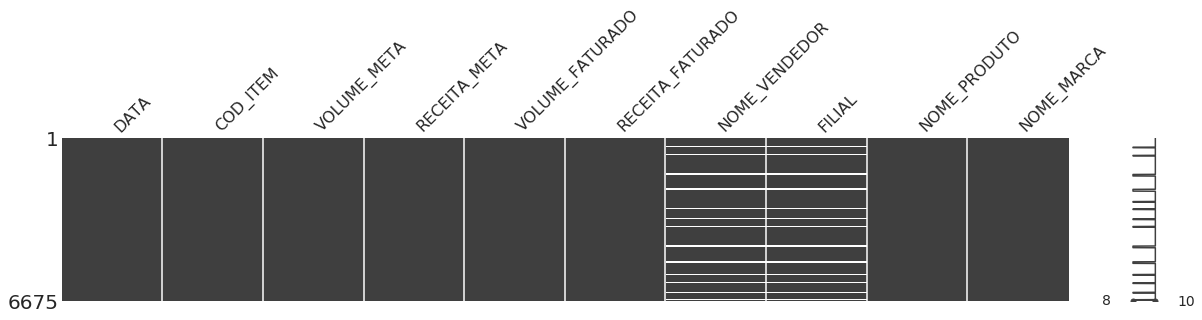

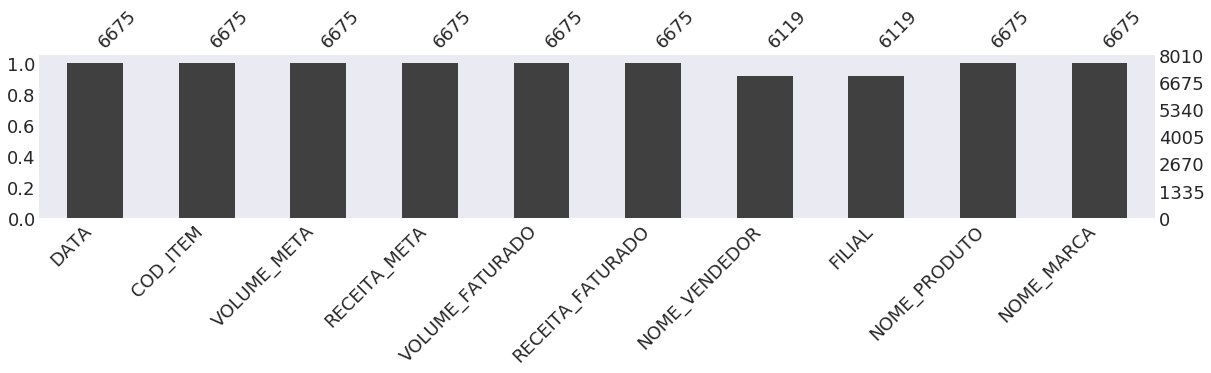

In [74]:
msno.matrix(df=data, figsize=(20, 3)) #Grafico de valores faltantes
msno.bar(df=data,figsize=(20,3),fontsize=18,labels=True)

In [75]:
data_completo = data.fillna(value='DESCONHECIDO') #Criando uma base que preserva a linhas com NaN
data  = data.dropna() #Retirando as linhas com valores vazios
data.isnull().sum()

DATA                0
COD_ITEM            0
VOLUME_META         0
RECEITA_META        0
VOLUME_FATURADO     0
RECEITA_FATURADO    0
NOME_VENDEDOR       0
FILIAL              0
NOME_PRODUTO        0
NOME_MARCA          0
dtype: int64

In [76]:
data.describe()

,VOLUME_META,RECEITA_META,VOLUME_FATURADO,RECEITA_FATURADO
count,6119.000000,6119.000000,6119.000000,6119.000000
mean,9.299395,6283.857656,9.304788,6550.415918
std,5.577935,4672.144964,5.505363,4793.584658
min,1.000000,300.000000,1.000000,250.000000
25%,5.000000,2800.000000,5.000000,3063.000000
50%,9.000000,5390.000000,9.000000,5513.000000
75%,13.000000,8260.000000,13.000000,8791.000000
max,45.000000,51750.000000,51.000000,44406.000000


## 3. Criando Tabela Dinamica (Pivot Table)


In [77]:
pd.pivot_table(data,index=['FILIAL'],values=['VOLUME_META','VOLUME_FATURADO'],aggfunc='sum')

,VOLUME_FATURADO,VOLUME_META
FILIAL,,
CENTRO-OESTE,9398,9505
NORDESTE,5972,5789
SUDESTE,36545,36560
SUL,5021,5049


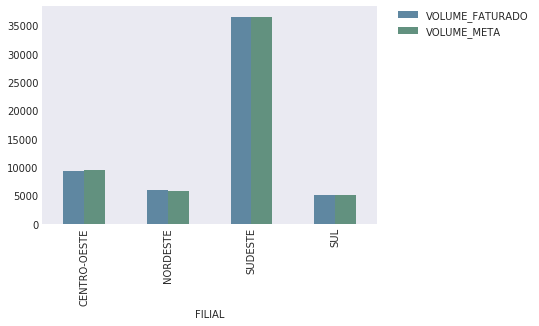

In [78]:
pd.pivot_table(data,index=['FILIAL'],
               values=['VOLUME_META','VOLUME_FATURADO'],
               aggfunc='sum').plot(kind='bar',figsize=(6,4))
# plt.legend(loc=2, bbox_to_anchor=(1.05, 1.0))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 3. Criando Widget para Pivot Table
Atraves da biblioteca ipywidgets, criar um widget interativo para escolher opcoes que apareceram no grafico

In [79]:
from ipywidgets import interact, SelectMultiple, Checkbox, RadioButtons, Dropdown
from IPython.display import display

In [80]:
def my_pivot(index=list(data.columns)[0], values=list(data.columns)[1], aggfunc='sum', plotting=False):
    dfp = data
    piv = pd.pivot_table(dfp, index=index, values=values, aggfunc=aggfunc)
#     print(piv)
    if plotting:
        piv.plot(kind='bar',figsize=(6,3))
#         sns.barplot(x='FILIAL',y='VOLUME_FATURADO',data=dfp)
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

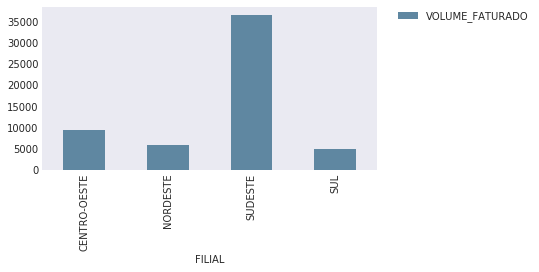

In [81]:
my_pivot(index=['FILIAL'],values=['VOLUME_FATURADO'],aggfunc='sum',plotting='True')

Abaixo tem uma função para utilizar widgets.

In [82]:
# i = interact(my_pivot,
#              index    = Dropdown(options=list(data.columns)[1:]),
#              values   = SelectMultiple(options=list(data.columns)),
#              aggfunc  = Dropdown(options=['sum','mean']),
#              plotting = RadioButtons(options = [False,True])
#             )
# display(i)

## 4. Análise Exploratória com Seaborn

Ajustar o esquema de cores

In [83]:
falconiweak = ["#5f87a1", 
           "#62917f","#af6f65",
           "#e9d3a1",
           "#bab9be"]

falconistrong = ["#3c6e8f",
           "#35705a","#934f46",
           "#c7b18a",
           "#929196"]
falconiblue = ["#5f87a1", "#3c6e8f"]
# sns.palplot(sns.color_palette(falconi))
sns.set_palette(falconiweak)

Plotando as metas de venda x venda faturada - Por filial.

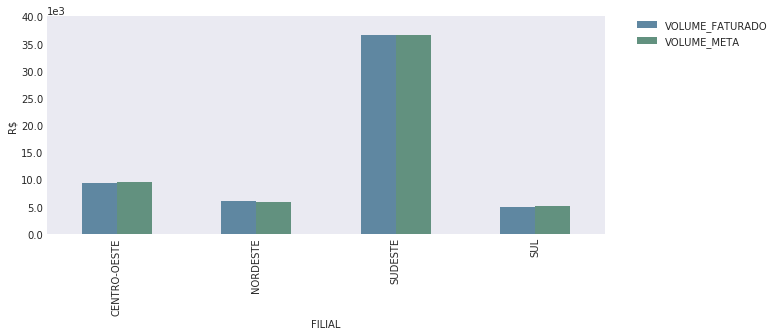

In [84]:
pd.pivot_table(data,index=['FILIAL'],
               values=['VOLUME_META','VOLUME_FATURADO'],
               aggfunc='sum').plot(kind='bar',figsize=(10,4))
# plt.legend(loc=2, bbox_to_anchor=(1.05, 1.0))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
locs,labels = plt.yticks()
locs = plt.yticks(locs, map(lambda x: "%.1f" % x, locs*1e-3))
plt.ylabel('R$')
text = plt.text(0.0, 1.01, '1e3', fontsize=10, transform = plt.gca().transAxes)

Plotando a quantidade de vendas.

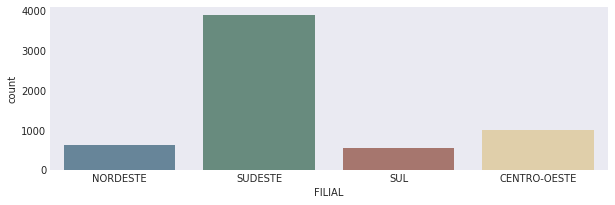

In [85]:
plt.figure(figsize=(10,3))
sns.countplot(x=data.FILIAL)

Utilizando o "pairplot" para vizualizar as relação entre todas as variáveis.

Checando a distribuição de Volume_Faturado por filial.

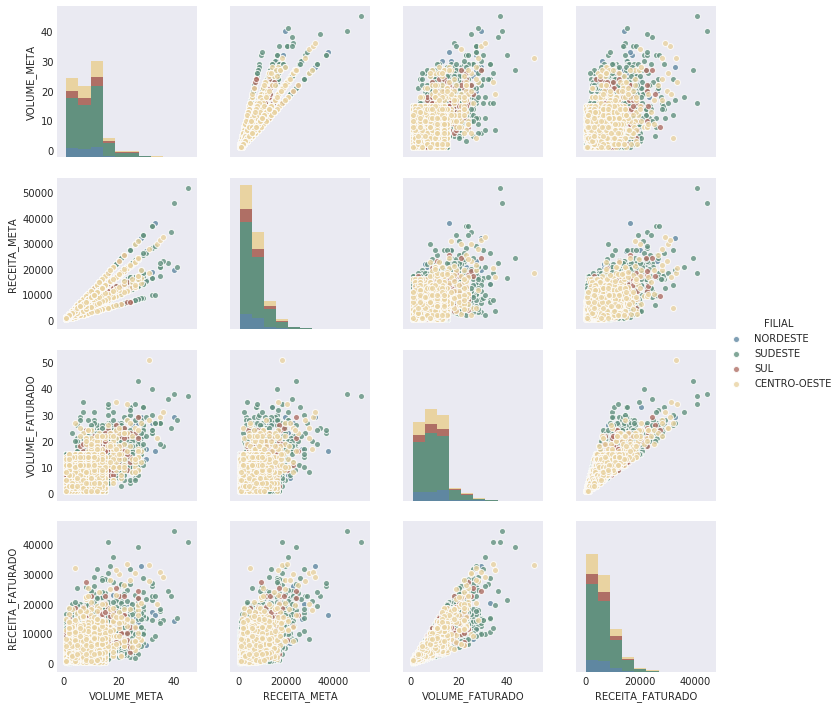

In [86]:
g = sns.pairplot(data=data, hue = 'FILIAL',plot_kws={'alpha':0.8})

Checando a distribuição de vendas por produto.

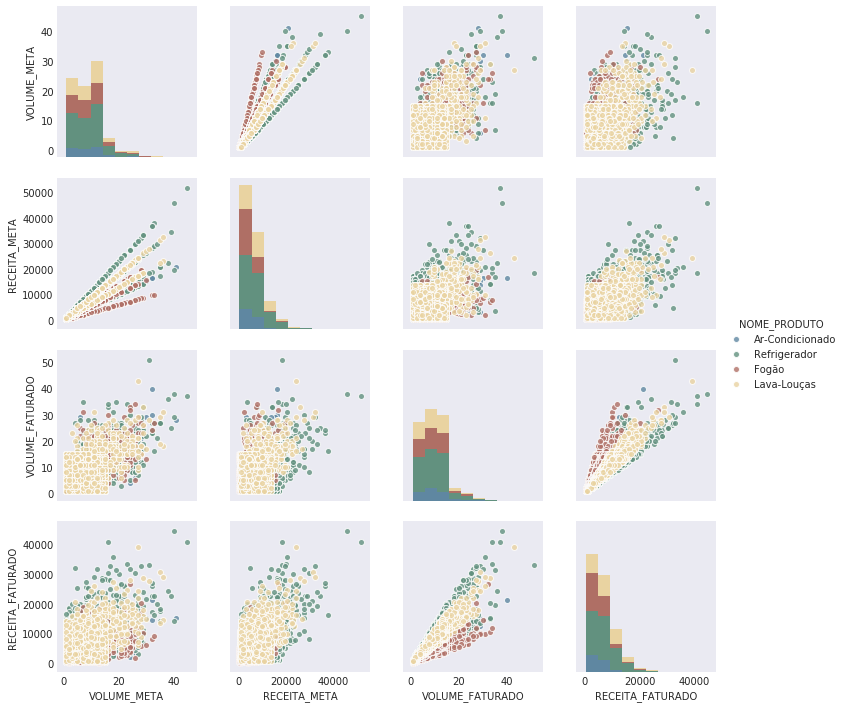

In [87]:
g = sns.pairplot(data=data, hue = 'NOME_PRODUTO',plot_kws={'alpha':0.8})

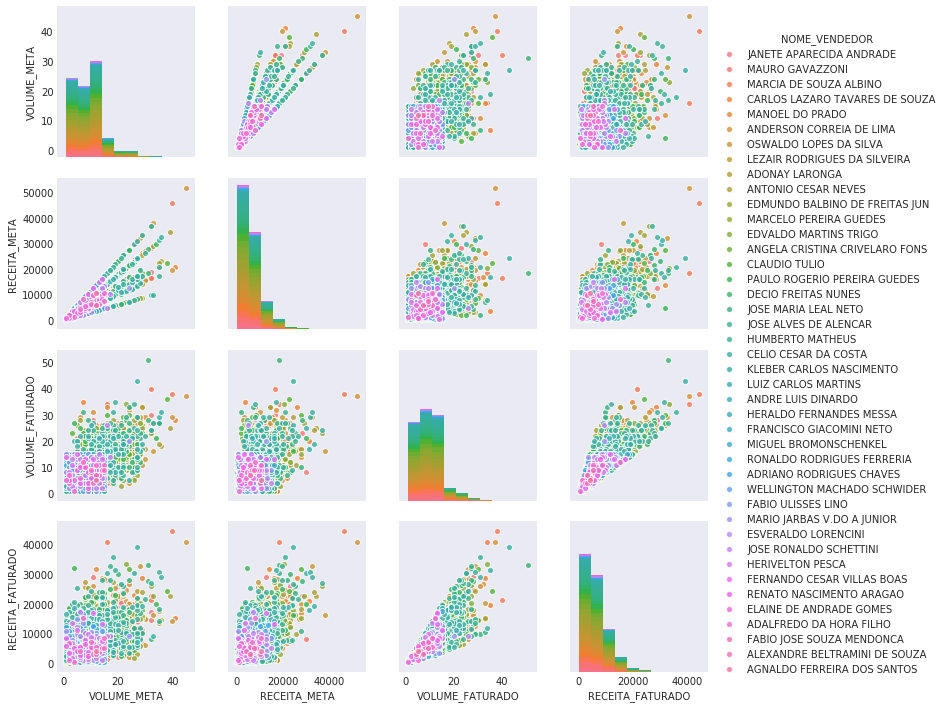

In [88]:
g = sns.pairplot(data=data, hue = 'NOME_VENDEDOR',plot_kws={'alpha':0.8})

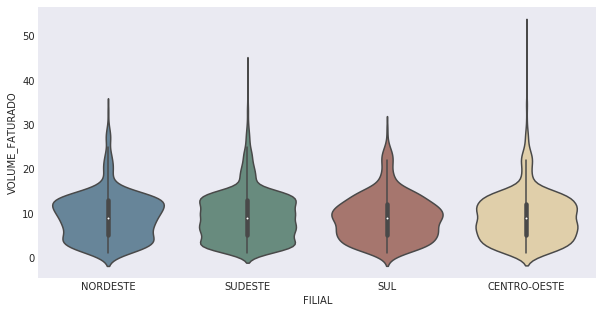

In [89]:
plt.figure(figsize=(10,5))
sns.violinplot(data=data,x='FILIAL',y='VOLUME_FATURADO')

F(x) =  716.572092336 *VOLUME_FATURADO +  -117.13574918
R-Squared =  0.822972680202  -------  P-value =  0.0 ------ Std_Error = 6.32434362354


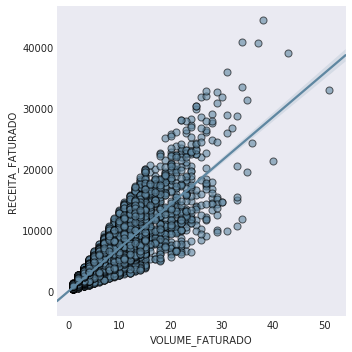

In [90]:
sns.lmplot('VOLUME_FATURADO','RECEITA_FATURADO',data=data,
           scatter_kws={"s": 50, "alpha": 0.6,'edgecolor':'black'})
slope, intercept, r_value, p_value, std_err = stats.linregress(data['VOLUME_FATURADO'],data['RECEITA_FATURADO'])
print('F(x) = ',slope,'*VOLUME_FATURADO + ', intercept)
print('R-Squared = ',r_value,' -------  P-value = ', p_value,'------ Std_Error =', std_err)

FILIAL = NORDESTE
F(x) =  637.762709986 *VOLUME_FATURADO +  402.557602426
R-Squared =  0.784820273872  -------  P-value =  1.56271099401e-135 ------ Std_Error = 19.8755573245
    
FILIAL = SUDESTE
F(x) =  710.683662268 *VOLUME_FATURADO +  -66.967069057
R-Squared =  0.821799019097  -------  P-value =  0.0 ------ Std_Error = 7.88809909214
    
FILIAL = SUL
F(x) =  730.508690548 *VOLUME_FATURADO +  -138.431154983
R-Squared =  0.823693871448  -------  P-value =  3.92928630883e-137 ------ Std_Error = 21.4822094596
    
FILIAL = CENTRO-OESTE
F(x) =  779.262855294 *VOLUME_FATURADO +  -599.143304656
R-Squared =  0.849405620149  -------  P-value =  4.12026248107e-285 ------ Std_Error = 15.1670885382
    


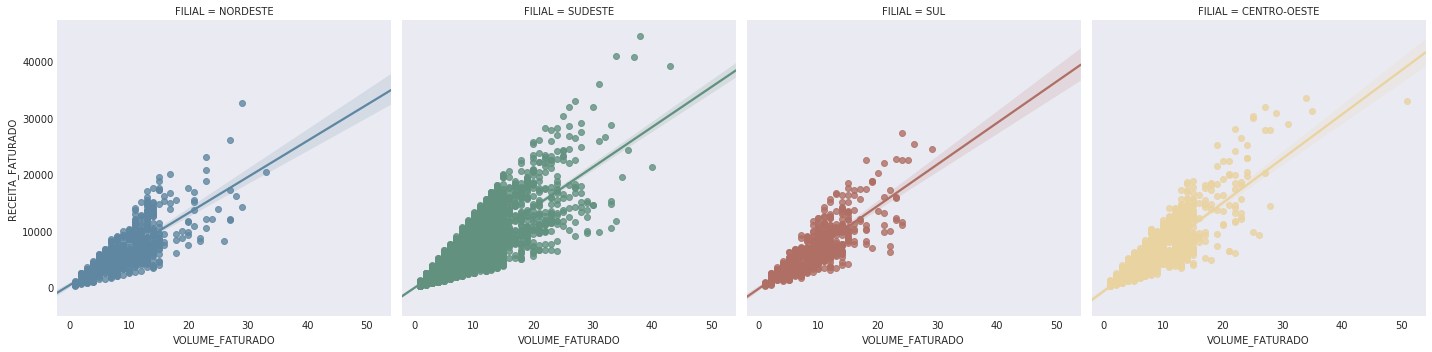

In [91]:
sns.lmplot('VOLUME_FATURADO','RECEITA_FATURADO',data=data,col='FILIAL',hue='FILIAL')
for filial in pd.unique(data['FILIAL']):
    slope, intercept, r_value, p_value, std_err = stats.linregress(data['VOLUME_FATURADO'][data.FILIAL == filial],
                                                                   data['RECEITA_FATURADO'][data.FILIAL == filial])
    
    print('FILIAL =', filial)
    print('F(x) = ',slope,'*VOLUME_FATURADO + ', intercept)
    print('R-Squared = ',r_value,' -------  P-value = ', p_value,'------ Std_Error =', std_err)
    print('    ')

FILIAL = NORDESTE
F(x) =  637.762709986 *VOLUME_FATURADO +  402.557602426
R-Squared =  0.784820273872  -------  P-value =  1.56271099401e-135 ------ Std_Error = 19.8755573245
    
FILIAL = SUDESTE
F(x) =  710.683662268 *VOLUME_FATURADO +  -66.967069057
R-Squared =  0.821799019097  -------  P-value =  0.0 ------ Std_Error = 7.88809909214
    
FILIAL = SUL
F(x) =  730.508690548 *VOLUME_FATURADO +  -138.431154983
R-Squared =  0.823693871448  -------  P-value =  3.92928630883e-137 ------ Std_Error = 21.4822094596
    
FILIAL = CENTRO-OESTE
F(x) =  779.262855294 *VOLUME_FATURADO +  -599.143304656
R-Squared =  0.849405620149  -------  P-value =  4.12026248107e-285 ------ Std_Error = 15.1670885382
    


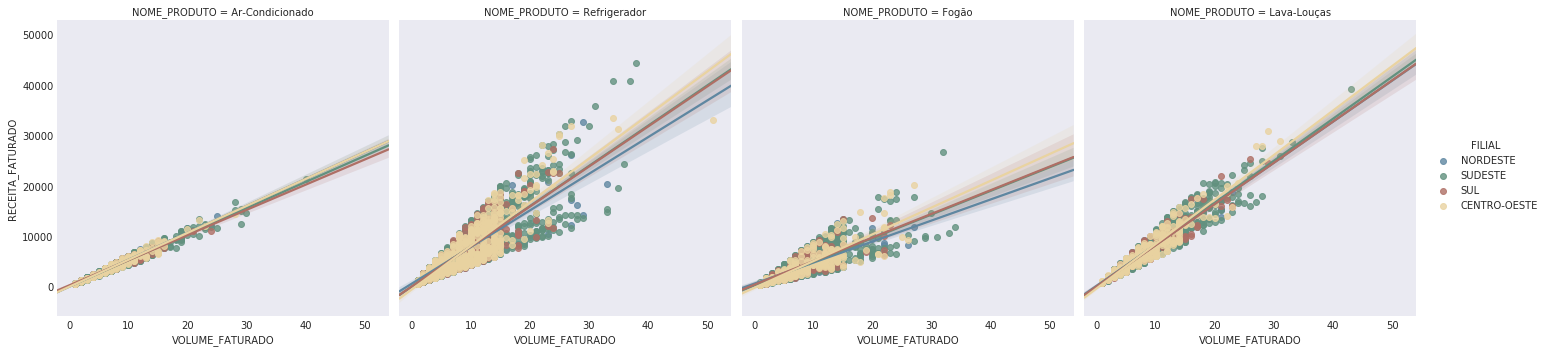

In [92]:
sns.lmplot('VOLUME_FATURADO','RECEITA_FATURADO',data=data,col='NOME_PRODUTO',hue='FILIAL')
for filial in pd.unique(data['FILIAL']):
    slope, intercept, r_value, p_value, std_err = stats.linregress(data['VOLUME_FATURADO'][data.FILIAL == filial],
                                                                   data['RECEITA_FATURADO'][data.FILIAL == filial])
    
    print('FILIAL =', filial)
    print('F(x) = ',slope,'*VOLUME_FATURADO + ', intercept)
    print('R-Squared = ',r_value,' -------  P-value = ', p_value,'------ Std_Error =', std_err)
    print('    ')

#### Visualizando vendas no tempo

In [93]:
data['ANO'] = data.DATA.dt.year
data['MES'] = data.DATA.dt.month
data['DIA'] = data.DATA.dt.day
data['DIA_SEMANA'] = data.DATA.dt.dayofweek

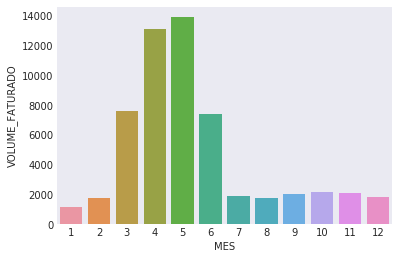

In [94]:
# plt.plot(data.groupby(by='MES')['VOLUME_FATURADO'].sum())
g = sns.barplot(x="MES", data=data,y ="VOLUME_FATURADO",estimator=sum,ci=False)

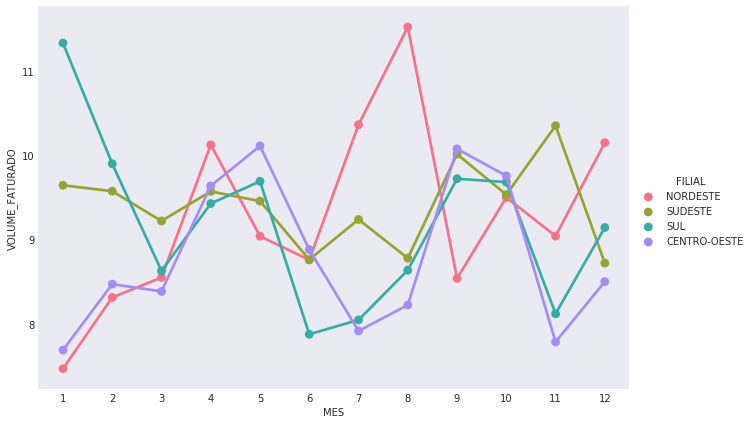

In [95]:
g = sns.factorplot(x="MES", data=data,y ="VOLUME_FATURADO",hue='FILIAL',
                   palette="husl", size=6, aspect=1.5,ci=None,)

### Corrigindo o Tipo de Dados e Formato

In [96]:
def guess_metadata(dataframe):
    ''' Pandas library, import pandas as pd'''
    ''' This function returns:
        variables = Dataframe with each variable and its type
        vartypes  = A dictionary for easier filtering of variables types'''
    
    df = dataframe
    variables = []
    vartypes = {}
    alltypes = ['nominal','binary','ordinal','continuos','datetime','unique'] #Essa é minha própria nomenclatura
    for variable in df.columns:
    #     print(variable)
        if len(pd.unique(df[variable].dropna())) == 2:
            variables.append([variable,'binary'])
        elif len(pd.unique(df[variable].dropna())) == 1:
            variables.append([variable,'unique'])
        elif df[variable].dtypes == int:
            variables.append([variable,'ordinal'])
        elif df[variable].dtypes == object:
            variables.append([variable,'nominal'])
        elif df[variable].dtypes == float:
            variables.append([variable,'continuos'])
        elif df[variable].dtypes == 'datetime64[ns]':
            variables.append([variable,'datetime'])
        else:
            variables.append([variable,'no type'])
            
    variables = pd.DataFrame(variables,columns=['name','type'])
    for i in alltypes:
        vartypes[i]=variables.name[(variables['type']==i)]
    return variables, vartypes

In [97]:
variables, vartypes = guess_metadata(data)

## Analisando Variáveis Nominais e Binárias

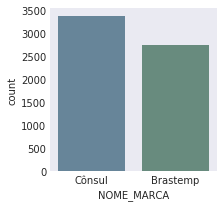

In [98]:
for variable in vartypes['binary']:
    plt.figure(figsize=(3,3))
    sns.countplot(x=data[variable])

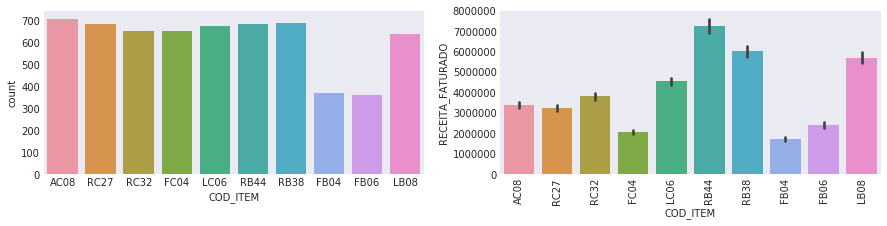

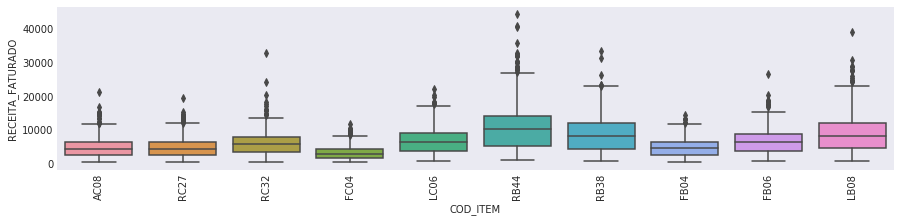

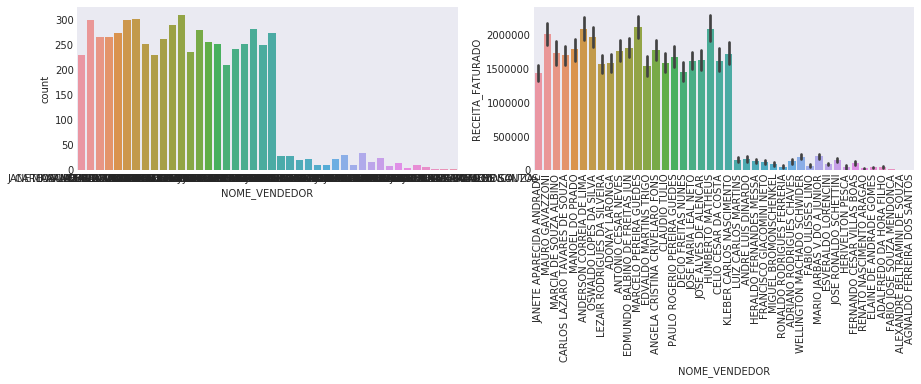

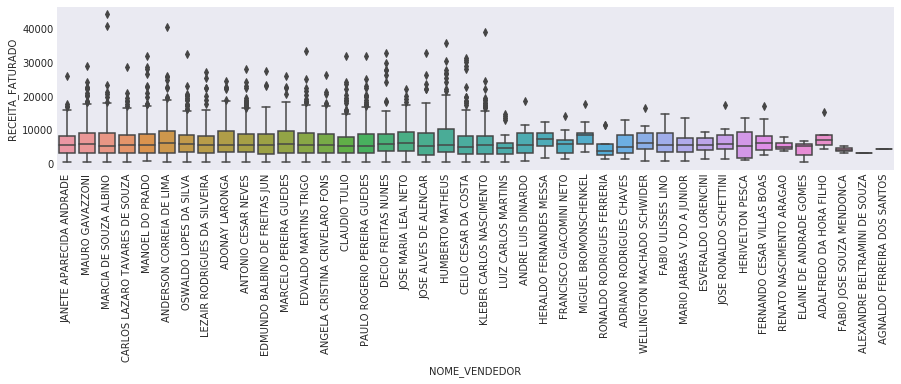

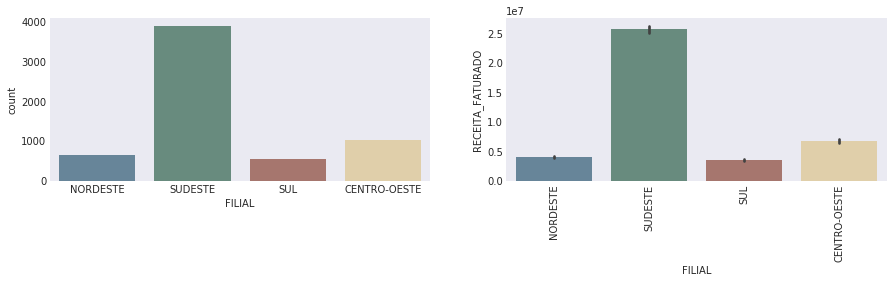

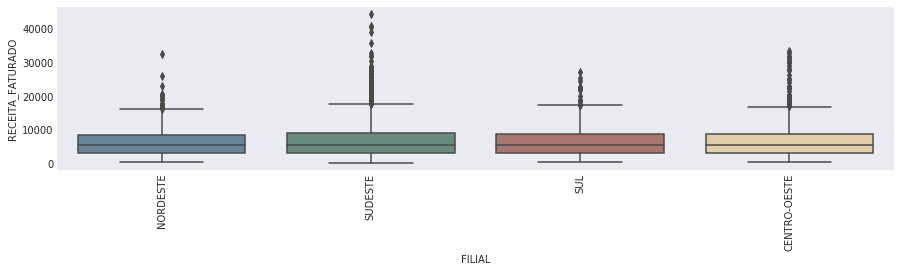

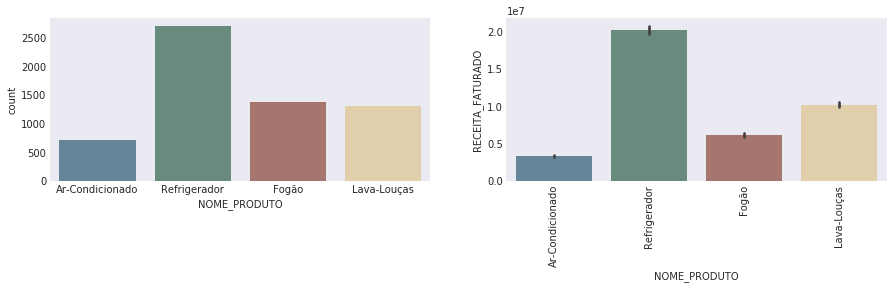

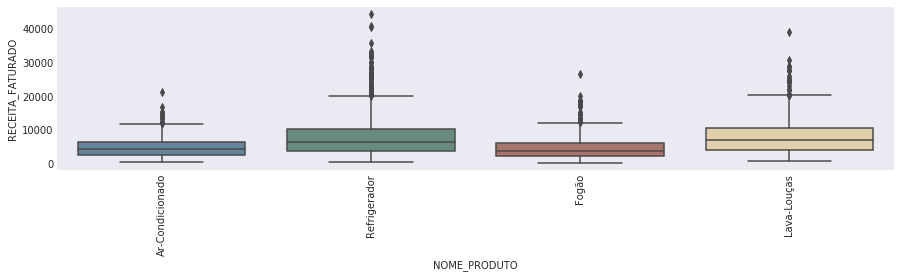

In [99]:
targetvariable = 'RECEITA_FATURADO'
for i in vartypes['nominal']:
    plt.figure(figsize=(15,3))
    plt.subplot(121)
    g= sns.countplot(x=i,data=data)
    plt.subplot(122)
    g= sns.barplot(x=i,y=targetvariable,data=data,estimator=sum)
    for item in g.get_xticklabels():
        item.set_rotation(90)
    plt.figure(figsize=(15,3))
    g = sns.boxplot(x=i,y=targetvariable,data=data)
    for item in g.get_xticklabels():
        item.set_rotation(90)

In [100]:
def adjust_dataformat(dataframe, variables):
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    df = dataframe.copy() 
    
    for variable in variables:
        le.fit(df[variable])
        df[variable] = le.transform(data[variable])
    return df

In [101]:
data_adjust = adjust_dataformat(data,vartypes['nominal'])
data_adjust = adjust_dataformat(data,vartypes['binary'])

In [102]:
print('Total number of variables',len(variables))
variables.pivot_table(values='name',index='type',aggfunc="count",fill_value=0)

Total number of variables 14


,name
type,
binary,1
datetime,1
nominal,4
ordinal,7
unique,1


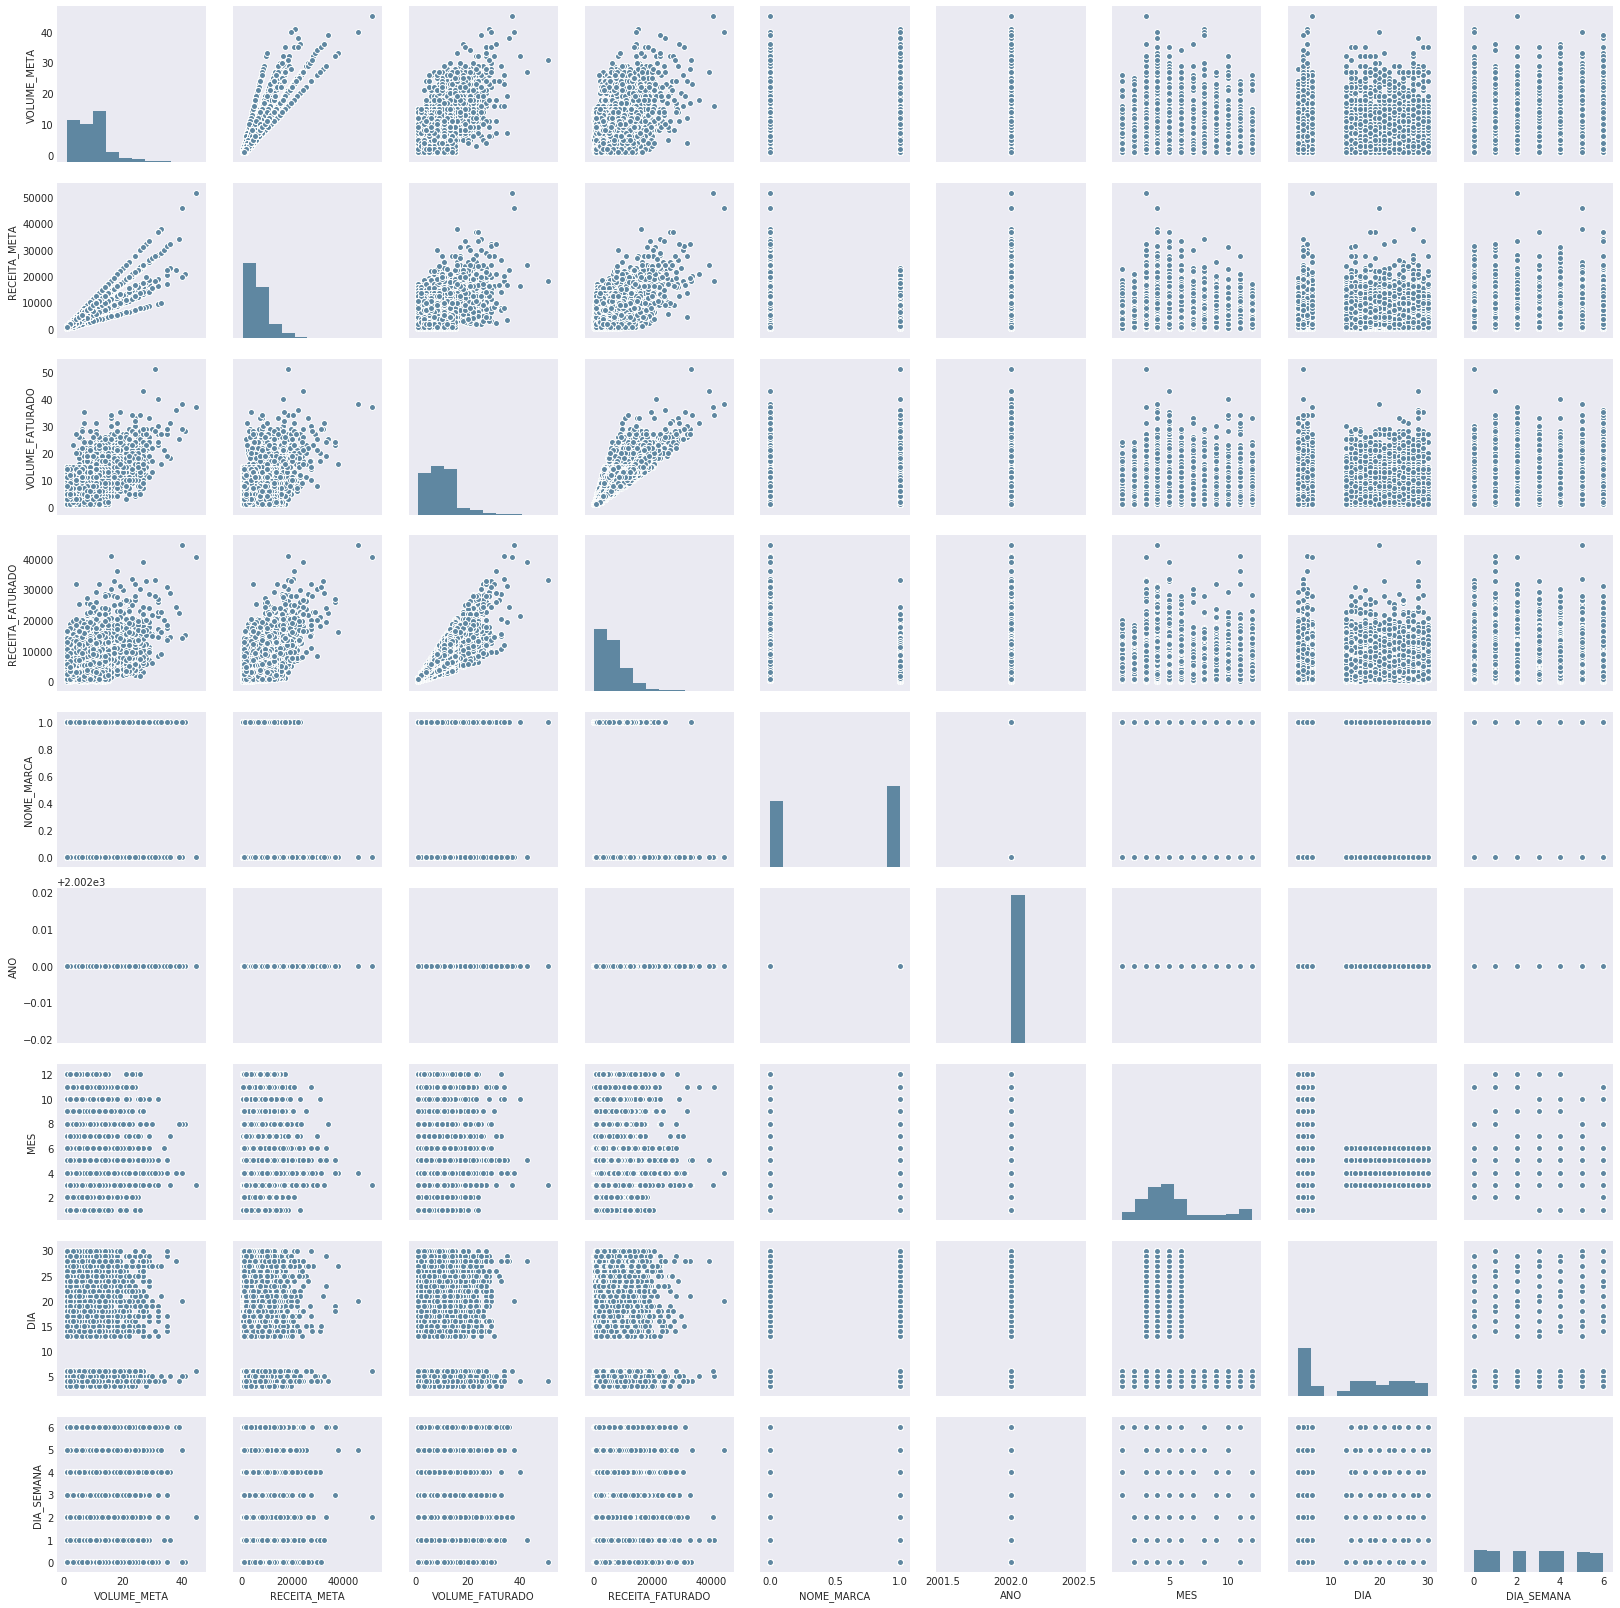

In [104]:
g = sns.pairplot(data=data_adjust)

# 6. Reducing Dimensionality (PCA)

In [211]:
data_pca = data[['VOLUME_FATURADO','RECEITA_FATURADO']].copy()

In [233]:
data_pca = pd.DataFrame(pd.pivot_table(data,index=['NOME_VENDEDOR'],columns=['NOME_PRODUTO'],
               values=['VOLUME_FATURADO','RECEITA_FATURADO'],
               aggfunc='sum')).reset_index(drop=True)
data_pca.fillna(value=0,inplace=True)
data_pca.head()

RECEITA_FATURADO                                     \
NOME_PRODUTO  Ar-Condicionado     Fogão Lava-Louças Refrigerador   
0                         0.0   12854.0      7052.0      20559.0   
1                    109551.0  208368.0    446250.0     821708.0   
2                     20955.0   25072.0     34985.0      44440.0   
3                         0.0       0.0         0.0       4269.0   
4                         0.0       0.0         0.0       3152.0   

             VOLUME_FATURADO                                  
NOME_PRODUTO Ar-Condicionado  Fogão Lava-Louças Refrigerador  
0                        0.0   17.0         9.0         23.0  
1                      210.0  402.0       544.0       1032.0  
2                       39.0   52.0        43.0         60.0  
3                        0.0    0.0         0.0          5.0  
4                        0.0    0.0         0.0          7.0

In [243]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data_pca)
# TODO: Transform log_samples using the PCA fit above
# pca_samples = pca.transform(log_samples)

# Generate PCA results plot
# pca_results = vs.pca_results(good_data, pca)
# print 'Explained Variance of first and second componentes = '\
#         ,pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]
    
# print 'Explained Variance of 1st to 4th = '\
#         ,np.sum(pca.explained_variance_ratio_[:4])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [244]:
data_reduced = pca.transform(data_pca)
data_reduced = pd.DataFrame(data_reduced)

In [245]:
print(pca.explained_variance_ratio_)

[ 0.98781329  0.0060835 ]


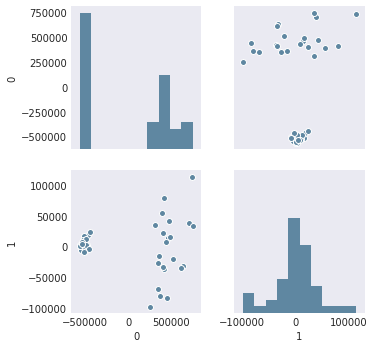

In [246]:
sns.pairplot(data_reduced)

In [247]:
dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

# PCA components
components = pd.DataFrame(np.round(pca.components_, 4), columns = data_pca.keys())
components.index = dimensions

In [248]:
components

RECEITA_FATURADO                                   \
NOME_PRODUTO  Ar-Condicionado   Fogão Lava-Louças Refrigerador   
Dimension 1            0.1406  0.2570      0.4239        0.857   
Dimension 2           -0.2207 -0.8989      0.3554        0.130   

             VOLUME_FATURADO                                   
NOME_PRODUTO Ar-Condicionado   Fogão Lava-Louças Refrigerador  
Dimension 1           0.0003  0.0005      0.0005       0.0011  
Dimension 2          -0.0004 -0.0017      0.0004       0.0002

In [217]:
data_reduced.columns = ['DIM1']
data_reduced.head()

,DIM1
0,-3448.417501
1,-300.414181
2,-1082.412887
3,-2020.414358
4,-2732.416876


In [218]:
data_reduced['NOME_VENDEDOR'] = data['NOME_VENDEDOR']
data_reduced['NOME_PRODUTO'] = data['NOME_PRODUTO']

Vamos transformar a coluna de NOME_PRODUTO diversas colunas, transformando cada produto em uma feature.

In [219]:
data_reduced = pd.DataFrame(pd.pivot_table(data_reduced,index=['NOME_VENDEDOR'],columns=['NOME_PRODUTO'],
               values=['DIM1'],
               aggfunc='sum')).reset_index(drop=True)
data_reduced.fillna(value=0,inplace=True)
data_reduced.head()

DIM1                                         
NOME_PRODUTO Ar-Condicionado         Fogão  Lava-Louças  Refrigerador
0                   0.000000  13430.170096 -2339.419887  -8275.837221
1              -54209.395106 -78703.689376  5164.761084  40656.744254
2               -5737.074685   8129.913450   -94.836150 -17027.911505
3                   0.000000      0.000000     0.000000  -4160.420018
4                   0.000000      0.000000     0.000000  -2118.412424

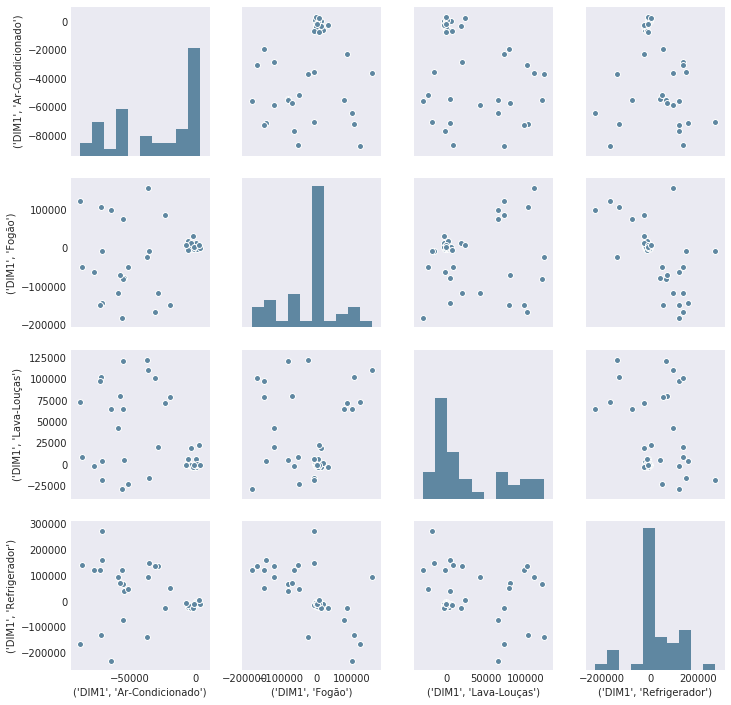

In [220]:
g = sns.pairplot(data_reduced)

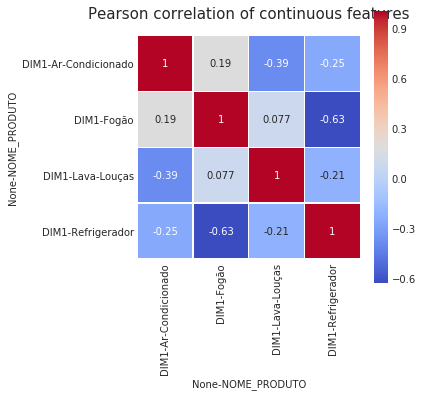

In [221]:
plt.figure(figsize=(5,5))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(data_reduced.corr(),linewidths=0.1,vmax=1.0, square=True, cmap='coolwarm', linecolor='white', annot=True)

Somente a venda de Fogão com Lava-Louças parece ter uma correlação mais significante (negativa).

In [228]:
# pca = PCA(n_components=2)
# pca.fit(data_reduced)
# data_reduced2 = pca.transform(data_reduced)
# data_reduced2 = pd.DataFrame(data_reduced2)
# print(pca.explained_variance_ratio_)

[ 0.70192314  0.15322645]


In [232]:
# sns.pairplot(data_reduced2)